In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

### Read Data and determine possible predictors

In [5]:
df = pd.read_csv('C:/Users/tyler/OneDrive/Documents/WGU/Statistical Data Mining/Task 1/D600 Task 1 Dataset 1 Housing Information.csv')

initial_df_prev = df.head(10)

initial_df_prev.to_html('./InitialDataSet.html',index=False)

# See whole numbers rather than scientific notation
pd.set_option('display.float_format', '{:,.2f}'.format)

In [6]:
predictors = ['PreviousSalePrice','PropertyTaxRate','SquareFootage','BackyardSpace','AgeOfHome','IsLuxury','Fireplace','Garage','Floors']
outcome = 'Price' 

## Continuous Variables: Univariate Distribution visualization

In [7]:
# ----- CONTINUOUS VARIABLES -----
variables = ['PreviousSalePrice','PropertyTaxRate','SquareFootage','BackyardSpace','AgeOfHome','Price']
for var in variables:   
    # Calculate statistics
    mean_val = df[var].mean()
    median_val = df[var].median()
    mode_val = df[var].mode().iloc[0] if not df[var].mode().empty else 'N/A'
    var_val = df[var].var()
    std_val = df[var].std()

    # Create legend text
    stats_text = (f"Mean: {mean_val:.2f}\n"
                  f"Median: {median_val:.2f}\n"
                  f"Mode: {mode_val:.2f}\n"
                  f"Variance: {var_val:.2f}\n"
                  f"Std Dev: {std_val:.2f}")

    plt.figure(figsize=(12,5))
    # Histogram
    plt.subplot(1,2,1)
    sns.set_theme(style='darkgrid')
    sns.histplot(data=df[var],kde=True)
    plt.title(f"Distribution of {var}")
    # Dummy Line for Legend
    plt.plot([], [], ' ', label=stats_text)
    plt.legend(loc='upper right', fontsize='small')    
    # Features
    plt.tight_layout()
    # plt.show()
    # Save chart to file
    plt.savefig(f"images/distribution_of_{var}.png")
    plt.close()

### Continuous Variables: Bivariate Distribution Visualization

In [8]:
variables = ['PreviousSalePrice','PropertyTaxRate','SquareFootage','BackyardSpace','AgeOfHome']
for var in variables:
    # --- Scatterplot for Bivariate visualizations ---
    plt.figure(figsize=(12,6))
    plot = sns.scatterplot(data=df, x=f"{var}", y='Price', palette='Set2', alpha=0.7)

    plt.title(f"Price vs {var}")
    plt.xlabel(f"{var}")
    plt.ylabel('Price')
    plt.tight_layout()
    plt.savefig(f"images/Bivariate_distribution_of_{var}.png")
    plt.close()

C:\Users\tyler\AppData\Local\Temp\ipykernel_60880\1613596173.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.scatterplot(data=df, x=f"{var}", y='Price', palette='Set2', alpha=0.7)
C:\Users\tyler\AppData\Local\Temp\ipykernel_60880\1613596173.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.scatterplot(data=df, x=f"{var}", y='Price', palette='Set2', alpha=0.7)
C:\Users\tyler\AppData\Local\Temp\ipykernel_60880\1613596173.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.scatterplot(data=df, x=f"{var}", y='Price', palette='Set2', alpha=0.7)
C:\Users\tyler\AppData\Local\Temp\ipykernel_60880\1613596173.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.scatterplot(data=df, x=f"{var}", y='Price', palette='Set2', alpha=0.7)
C:\Users\tyler\AppData\Local\Temp\ipykernel_60880\1613596173.py:5: UserWarning: Ignoring

In [9]:
# Standardize the dataset for PCA processing
predictors = ['PreviousSalePrice','PropertyTaxRate','SquareFootage','BackyardSpace','AgeOfHome']
outcome = 'Price' 
X = df[predictors]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=predictors)
X_scaled_df

Standardized_Dataset = pd.DataFrame(X_scaled_df).head(10)
Standardized_Dataset.to_html('./Standardized_Dataset.html',index=False)

In [10]:
df[predictors +['Price']].describe()

,PreviousSalePrice,PropertyTaxRate,SquareFootage,BackyardSpace,AgeOfHome,Price
count,"7,000.00","7,000.00","7,000.00","7,000.00","7,000.00","7,000.00"
mean,"284,509.35",1.50,"1,048.95",511.51,46.80,"307,281.97"
std,"185,734.02",0.50,426.01,279.93,31.78,"150,173.43"
min,"-8,356.90",0.01,550.00,0.39,0.01,"85,000.00"
25%,"142,013.98",1.16,660.82,301.00,20.76,"192,107.53"
50%,"262,183.13",1.49,996.32,495.97,42.62,"279,322.95"
75%,"396,121.17",1.84,"1,342.29",704.01,67.23,"391,878.13"
max,"1,296,606.69",3.36,"2,874.70","1,631.36",178.68,"1,046,675.64"


In [11]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Get the component matrix
component_matrix = pd.DataFrame(pca.components_,columns=predictors,index=[f"PC{i+1}" for i in range(len(predictors))])
# Display the component matrix
component_matrix

component_matrix.head(10).to_html('./PCAComponent_Matrix.html')

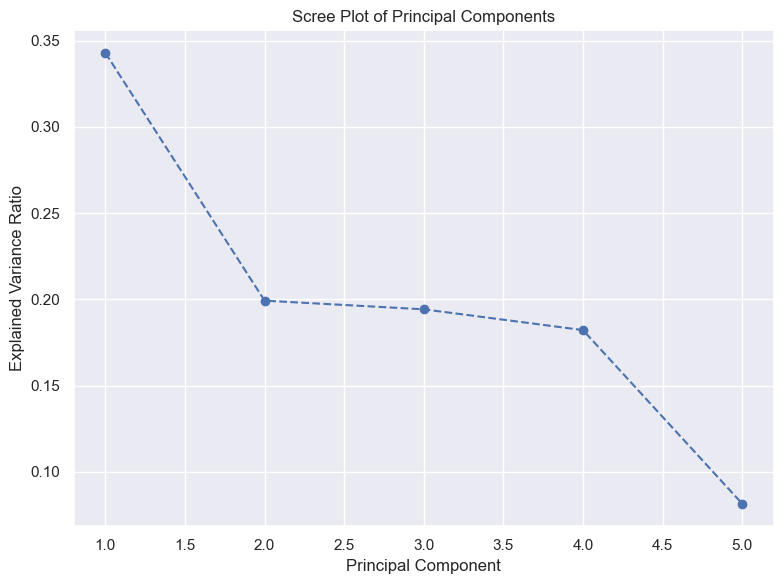

In [12]:
# Generate scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"images/PCA_SCREEPLOT.png")
plt.show()

In [13]:
# Get explained variance ratios from PCA
explained_variance_ratios = pca.explained_variance_ratio_

# Create a summary table for the first 2 components
retained_variance = pd.DataFrame({
    'Principal Component': ['PC1', 'PC2'],
    'Explained Variance Ratio': explained_variance_ratios[:2],
    'Explained Variance (%)': explained_variance_ratios[:2] * 100
})

# Display the result
print(retained_variance)

  Principal Component  Explained Variance Ratio  Explained Variance (%)
0                 PC1                      0.34                   34.29
1                 PC2                      0.20                   19.92


In [14]:
# Create summary table
pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_))],
    'Eigenvalue': pca.explained_variance_,
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Variance': np.cumsum(pca.explained_variance_ratio_)
})

# Display the first few rows
pca_summary.head(5)

,Principal Component,Eigenvalue,Explained Variance Ratio,Cumulative Variance
0,PC1,1.71,0.34,0.34
1,PC2,1.00,0.20,0.54
2,PC3,0.97,0.19,0.74
3,PC4,0.91,0.18,0.92
4,PC5,0.41,0.08,1.00


In [15]:
# Partition Dataset to Test/Train

In [16]:
# Crate new X with PC1 & PC2 from the Principal Component Analysis
X_pca_reduced = X_pca[:,:2]
# Declare Y variable
y = df['Price']
# Split to train/test sets with 40% being the test size and 60% being the train size
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.4, random_state=42)
pc_columns = ['PC1', 'PC2']
X_train_df = pd.DataFrame(X_train, columns=pc_columns).reset_index(drop=True)
X_test_df = pd.DataFrame(X_test, columns=pc_columns).reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
# Combine X and Y for submission files
train_set = pd.concat([X_train_df, y_train], axis=1)
test_set = pd.concat([X_test_df, y_test], axis=1)


In [17]:
# Initialize LR Model and Fit

In [18]:
# Store list of predictors
X_predictors = X_train_df.columns
# DYnamically create regression formula string
formula = 'Price ~' + ' + '.join(X_predictors)
# Fit the regression model
car_lm = smf.ols(formula=formula,data=train_set).fit() 
# Ensure test set has the same variables as used in the formula
X_test_pred = X_test_df[X_predictors].copy()
# Add Constant Intercept to match the model
X_test_pred_const = sm.add_constant(X_test_pred)
# Predict using the model
y_pred = car_lm.predict(X_test_pred_const)
# Calculate Mean Squared Error
initial_mse = mean_squared_error(y_test,y_pred)
# Calculate Root Mean Squared Error
initial_rmse = initial_mse ** 0.5
print(f"Initial Mean Squared Error (MSE):{initial_mse}:.2f")
print(f"Initial Root Mean Squared Error (RMSE):{initial_rmse}:.2f")

Initial Mean Squared Error (MSE):9268266675.13629:.2f
Initial Root Mean Squared Error (RMSE):96271.83739358198:.2f


In [19]:
# Optimize using Backward Step Elimination

In [29]:
# Combine retained PCs and target into one DataFrame
train_data = pd.concat([X_train_df[['PC1', 'PC2']], y_train.reset_index(drop=True)], axis=1)

# Define backward elimination function
def backward_elimination(data, target, predictors, p_threshold=0.05):
    remaining = predictors.copy()
    removed_vars = []

    while remaining:
        formula = f"{target} ~ {' + '.join(remaining)}"
        model = sm.OLS.from_formula(formula, data).fit()

        # Drop intercept for p-value check
        pvals = model.pvalues.drop('Intercept', errors='ignore')
        max_pval = pvals.max()

        if max_pval > p_threshold:
            worst = pvals.idxmax()
            remaining.remove(worst)
            removed_vars.append((worst, max_pval))
            print(f"Removed '{worst}' (p = {max_pval:.4f})")
        else:
            break

    # Final model
    if remaining:
        final_formula = f"{target} ~ {' + '.join(remaining)}"
        final_model = sm.OLS.from_formula(final_formula, data).fit()
        return final_model, final_formula, removed_vars
    else:
        print("All variables removed. No model retained.")
        return None, None, removed_vars

# Run optimization
predictors = ['PC1', 'PC2']
final_model, final_formula, removed = backward_elimination(train_data, 'Price', predictors)

# Display summary
if final_model:
    print(final_model.summary())
else:
    print("No final model to display.")

# Save the summary table as an HTML file
summary_html = final_model.summary().as_html()

with open("./OLS_Reg_Summary.html", "w") as f:
    f.write(summary_html)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     2981.
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:59:45   Log-Likelihood:                -54174.
No. Observations:                4200   AIC:                         1.084e+05
Df Residuals:                    4197   BIC:                         1.084e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.078e+05   1493.283    206.116      0.0

In [25]:
# Predict on training set using the final model
y_train_pred = final_model.predict(X_train_df[['PC1', 'PC2']])

# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** .05
print(f"Optimized Mean Squared Error (MSE):{mse_train:.2f}")
print(f"Optimized Root Mean Squared Error (RMSE):{rmse_train:.2f}")

Optimized Mean Squared Error (MSE):9356676480.20
Optimized Root Mean Squared Error (RMSE):3.15


In [26]:
# Predict on test set using the final model
y_test_pred = final_model.predict(X_test_df[['PC1', 'PC2']])

# Calculate Mean Squared Error
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** .05
print(f"Optimized Mean Squared Error (MSE):{mse_test:.2f}")
print(f"Optimized Root Mean Squared Error (RMSE):{rmse_test:.2f}")

Optimized Mean Squared Error (MSE):9268266675.14
Optimized Root Mean Squared Error (RMSE):3.15


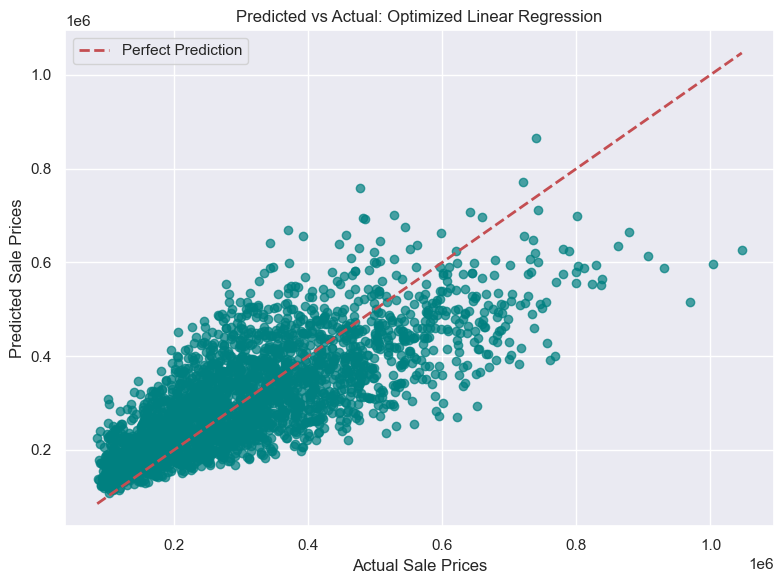

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Predicted vs Actual: Optimized Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('images/predicted_vs_actual.png')
plt.show()